<a href="https://colab.research.google.com/github/KimaniKibuthu/flight-fare-prediction/blob/main/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Fare Prediction
This is a project aimed at predicting the fare of an air ticket.

**Evaluation Metric**

np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean()). The benchmark being above 0.85

The others that will be used include:
* RMSE - One below 2000
* R2 score - One above 0.85

It will be tackled in four steps:
* Data obtainance
* Data cleaning and exploration
* Modelling and Evaluation
* Deployment

# Libraries Used

In [2]:
!pip install catboost

     |████████████████████████████████| 67.3MB 59kB/s 


In [82]:
# General libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV

# Modelling libraries
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, VotingRegressor
import xgboost as xgb
import catboost
from sklearn.metrics import mean_squared_error, r2_score



# Data Obtainance

The data is obtained from kaggle as a dataset loaded by Machine Hack(https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh)




In [4]:
from google.colab import files
files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


{'Data_Train.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00\xa1g\xaf\x0b\x86\xe8\x07\x00vv?\x00\x18\x00\x00\x00xl/worksheets/sheet1.xml\x8c\xbdK\x93\xf5\xccq\xa4\xb9\x9f_A\xe3~\x9a\x07y\x87\x8cR[\xb3.\x00\xa4\xcd\xd8\xdc\xf6l\xf2\x93Dk^d$[\x9a\xf9\xf7\xf3V\x1d\x14U\xee\x9e\xe19;\x89\x1e\xdf\x012\xde\xac@>\x19\x91\x91\xbf\xfc\xaf\xff\xcf\x1f~\xff\xb3\x7f\xff\xe9\xcf\x7f\xf9\xdd\x9f\xfe\xf8\xf7?\xdf\xfe\xcb\xe3\xe7?\xfb\xe9\x8f\xbf\xf9\xd3o\x7f\xf7\xc7\x7f\xf9\xfb\x9f\xff_\xff\xe7\xfb\xff:~\xfe\xb3\xbf\xfc\xf5\xd7\x7f\xfc\xed\xaf\x7f\xff\xa7?\xfe\xf4\xf7?\xff\x7f\x7f\xfa\xcb\xcf\xff\xeb?\xfc/\xbf\xfc\x8f?\xfd\xf9\x7f\xfc\xe5_\x7f\xfa\xe9\xaf?\xfb\xf1\x03\x7f\xfc\xcb\xdf\xff\xfc_\xff\xfa\xd7\x7f\xfb\xbb_\xfc\xe2/\xbf\xf9\xd7\x9f\xfe\xf0\xeb\xbf\xfc\x97?\xfd\xdbO\x7f\xfc\xa1\xfc\xf3\x9f\xfe\xfc\x87_\xff\xf5\xc7\xff\xfb\xe7\x7f\xf9\xc5_\xfe\xed\xcf?\xfd\xfa\xb7\x9f\xff\xd1\x1f~\xff\x8b\xf4x\xb4_\xfc\xe1\xd7\xbf\xfb\xe3\xcf\x9f\xbf\xf0w\x7f\xfe\xff\xf3\x1b\x7f\xfa\xe7\x7f\xfe\xddo~

In [5]:
# Load them to variables
fare_train = pd.read_excel('/content/Data_Train.xlsx')
#fare_test =  pd.read_excel('/content/Test_set.xlsx')


In [6]:
# View train data
fare_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# View test data
#fare_test.info()

# Data Exploration and Cleaning

This phase will involve cleaning the data and exploring to see relationships

## Data Cleaning
Let's clean the data. 

In [8]:
# View the data
fare_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
# Drop any missing value ( Only one )
fare_train.dropna(inplace=True)


In [10]:
# Drop duplicates
fare_train.drop_duplicates(inplace=True)

In [11]:
# Reset index
fare_train.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10458,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10459,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10460,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Airline

Explore the airline feature

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

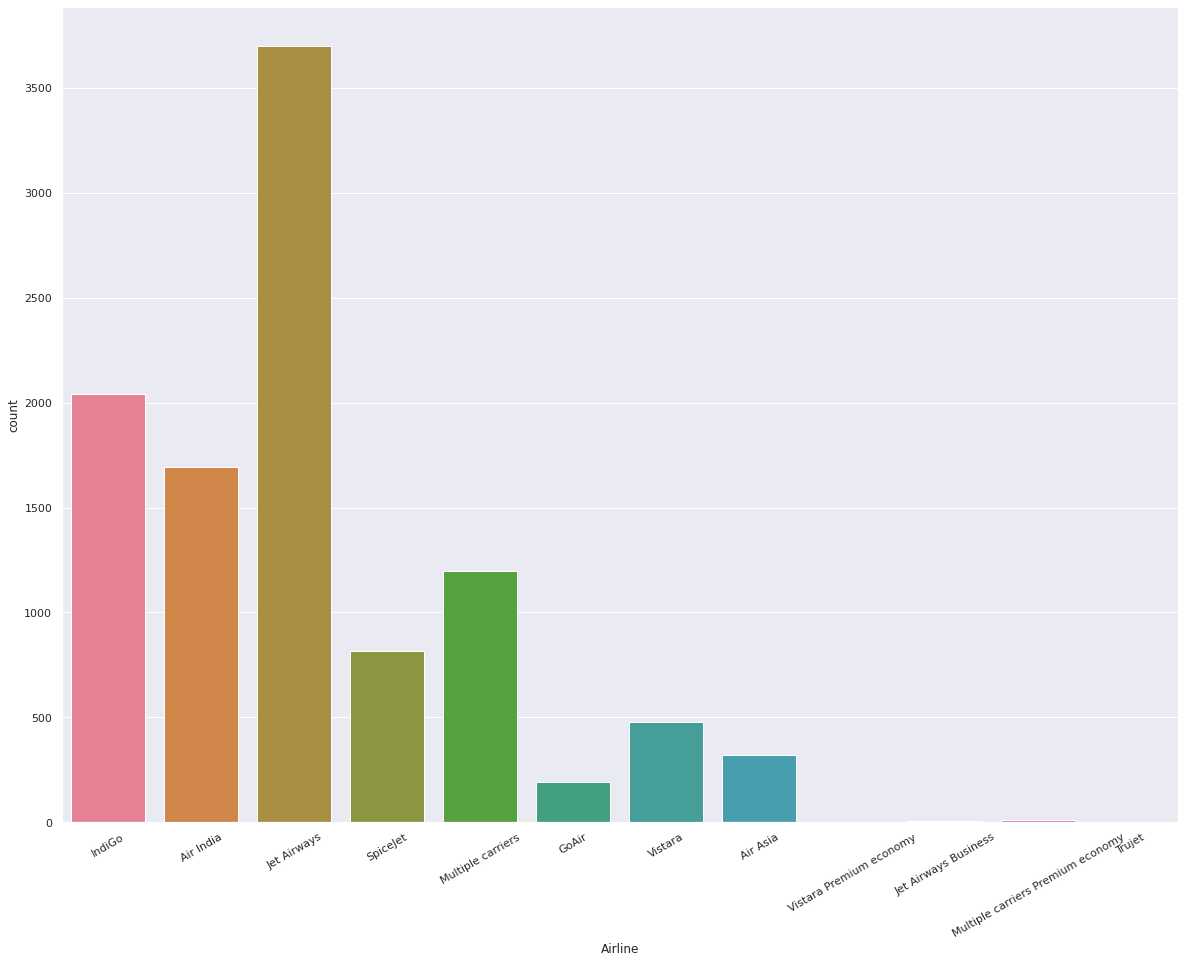

In [12]:
# visualize the counts
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.countplot(x='Airline', palette='husl', data=fare_train)
ag.set_xticklabels(labels=fare_train.Airline.unique(), rotation=30)

The most popular is jet airways

In [13]:
# Confirm value counts
fare_train.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

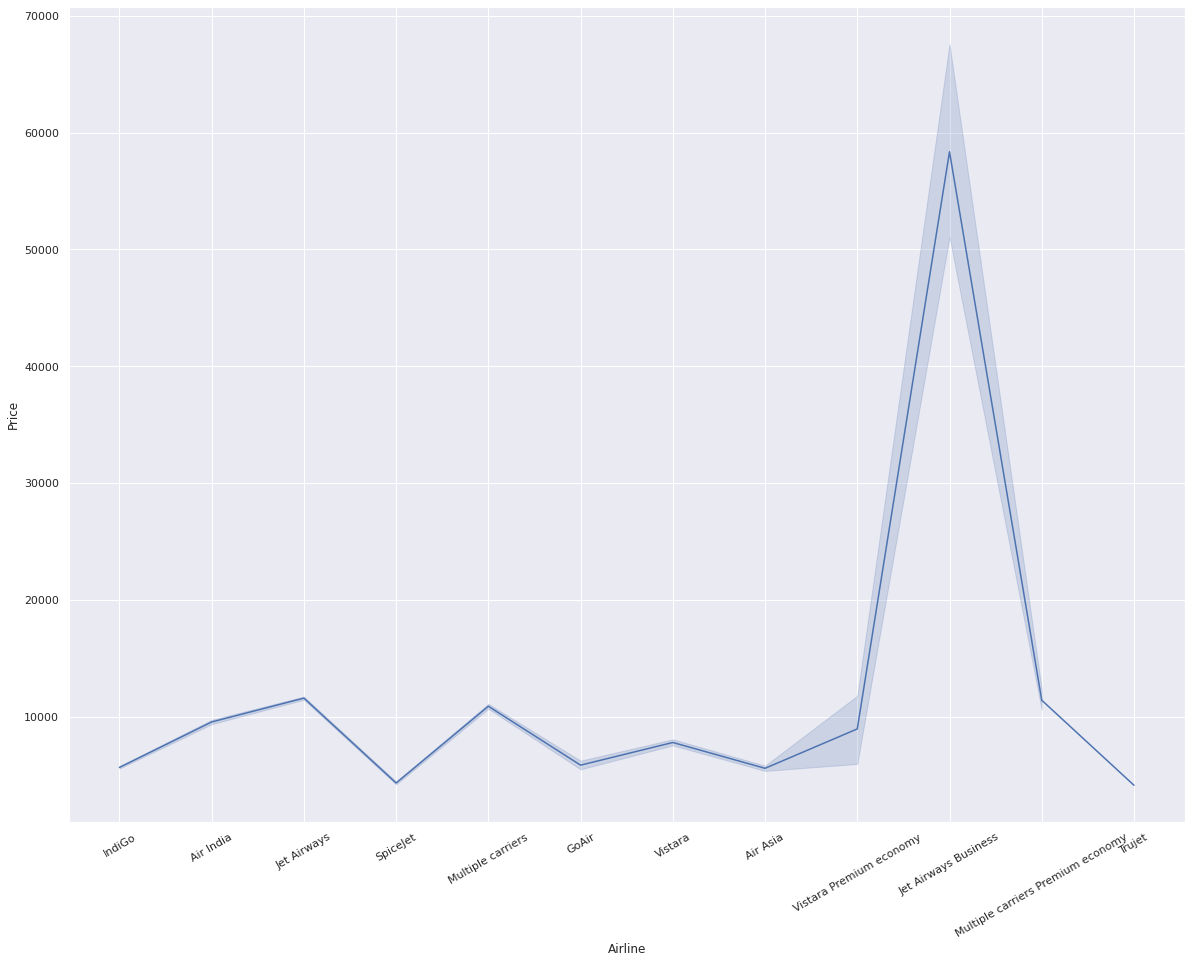

In [14]:
# View airline with price
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.lineplot(x='Airline', y='Price', palette='inferno', data=fare_train)
ag.set_xticklabels(labels=fare_train.Airline.unique(), rotation=30)

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

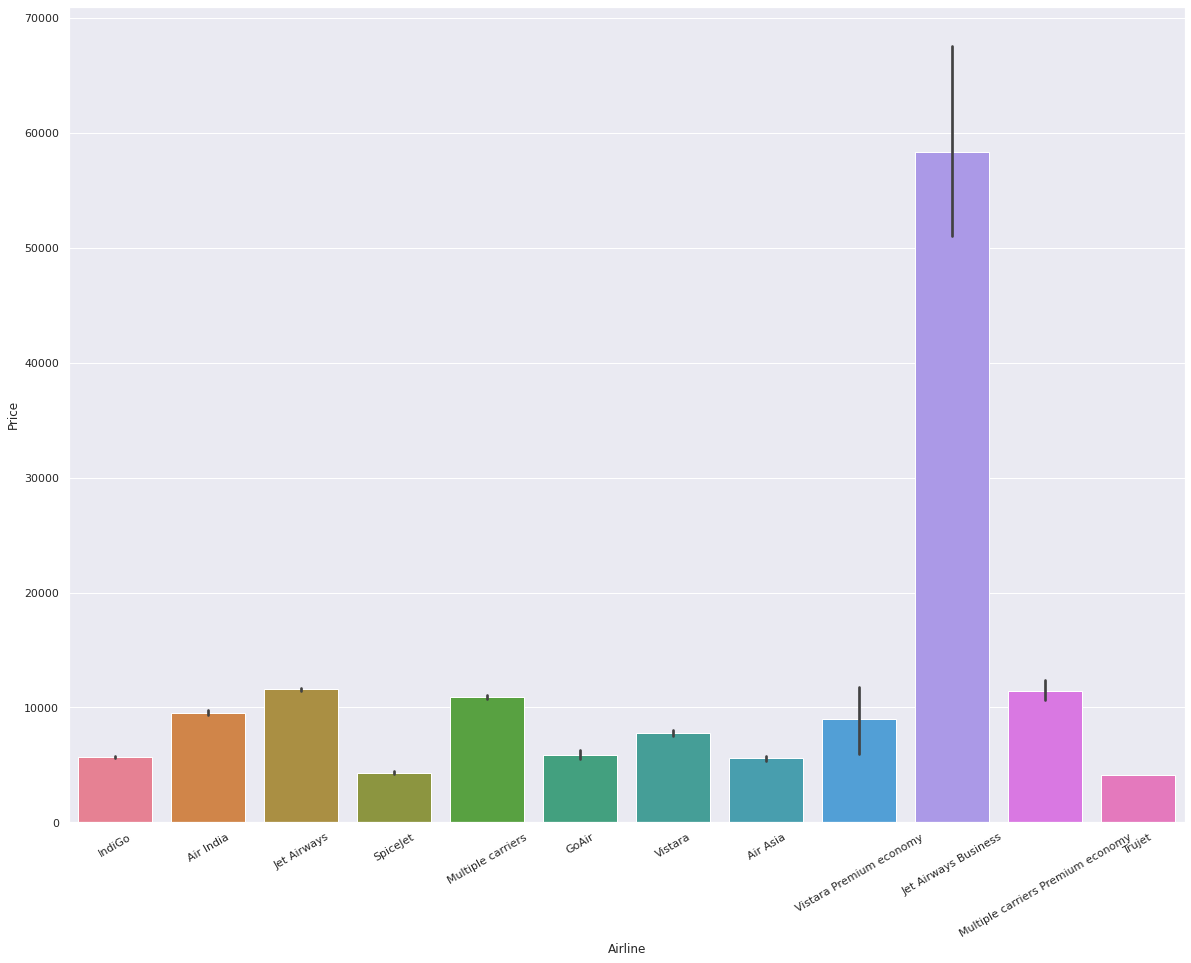

In [15]:
# visualize the counts
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.barplot(x='Airline', y='Price', palette='husl', data=fare_train)
ag.set_xticklabels(labels=fare_train.Airline.unique(), rotation=30)

Spice jet is the cheapest and Jet Airways Business is the most expensive.

### Date of Journey

We can convert it to a string and extract day, month and year

In [16]:
# Convert to datetime and extract year, hour and day
fare_train['Month'] = pd.to_datetime(fare_train['Date_of_Journey']).dt.month
fare_train['Day'] = pd.to_datetime(fare_train['Date_of_Journey']).dt.day
fare_train['Year'] = pd.to_datetime(fare_train['Date_of_Journey']).dt.year


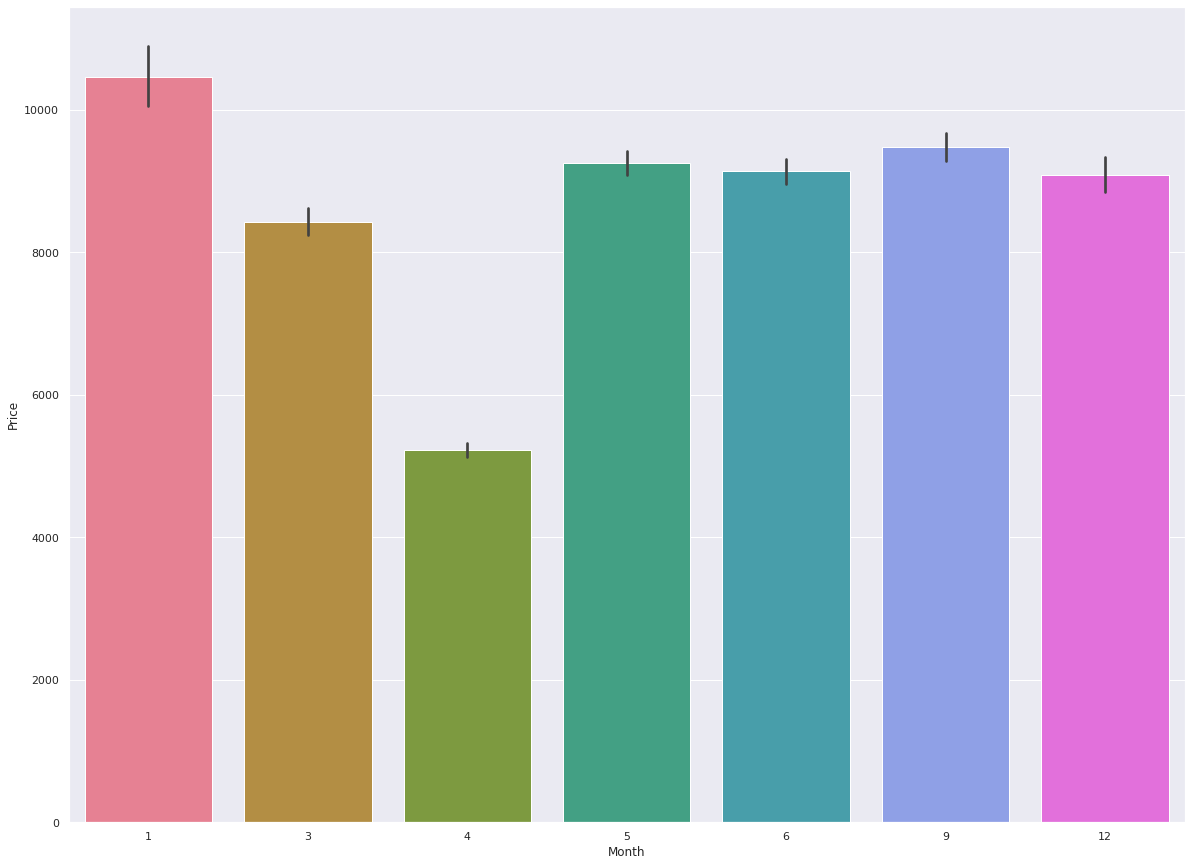

In [17]:
# View the relationship of month and price
# visualize the counts
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.barplot(x='Month', y='Price', palette='husl', data=fare_train)



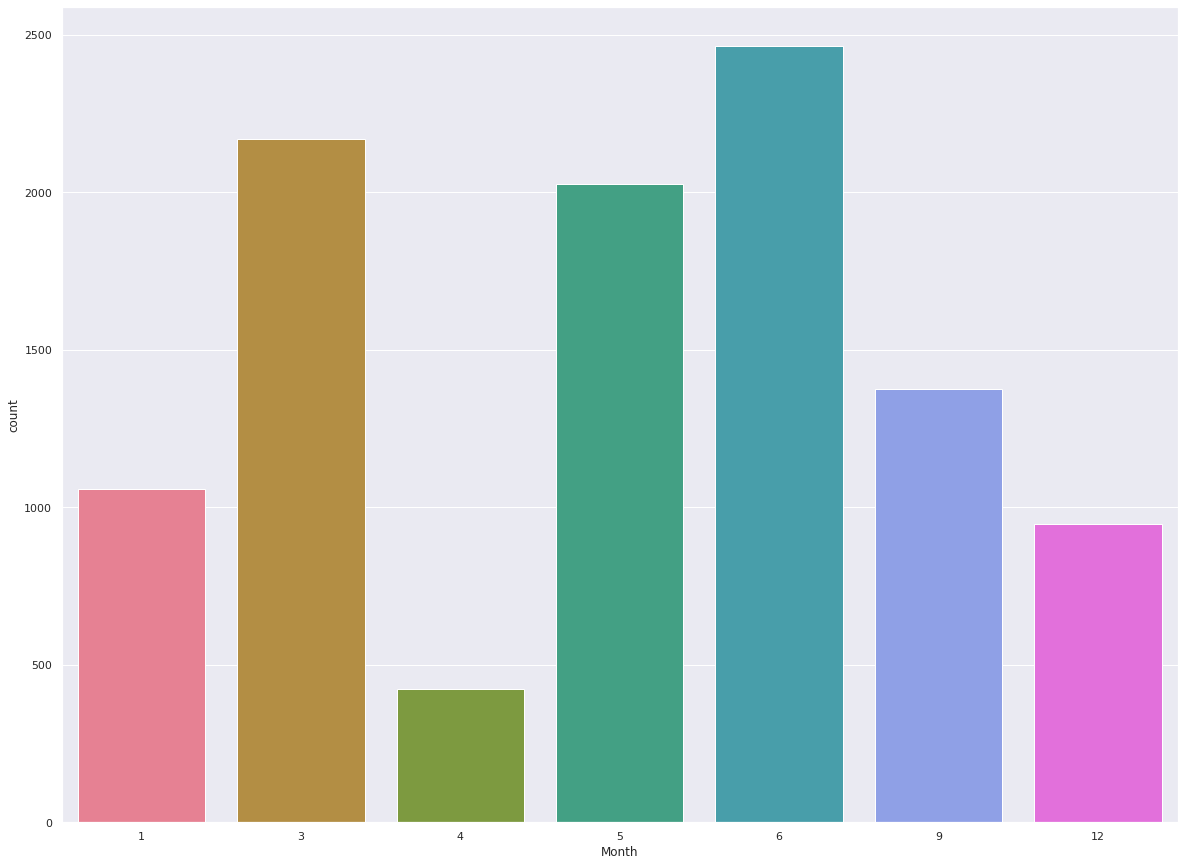

In [18]:
# Examples
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.countplot(x='Month', palette='husl', data=fare_train)

January and December had the highest prices yet had the least amount of examples.

### Source and Destination

In [19]:
# Check value counts
print('Source value counts')
print(fare_train.Source.value_counts())
print('-'* 35)
print('Destination value counts')
print(fare_train.Destination.value_counts())


Source value counts
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-----------------------------------
Destination value counts
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


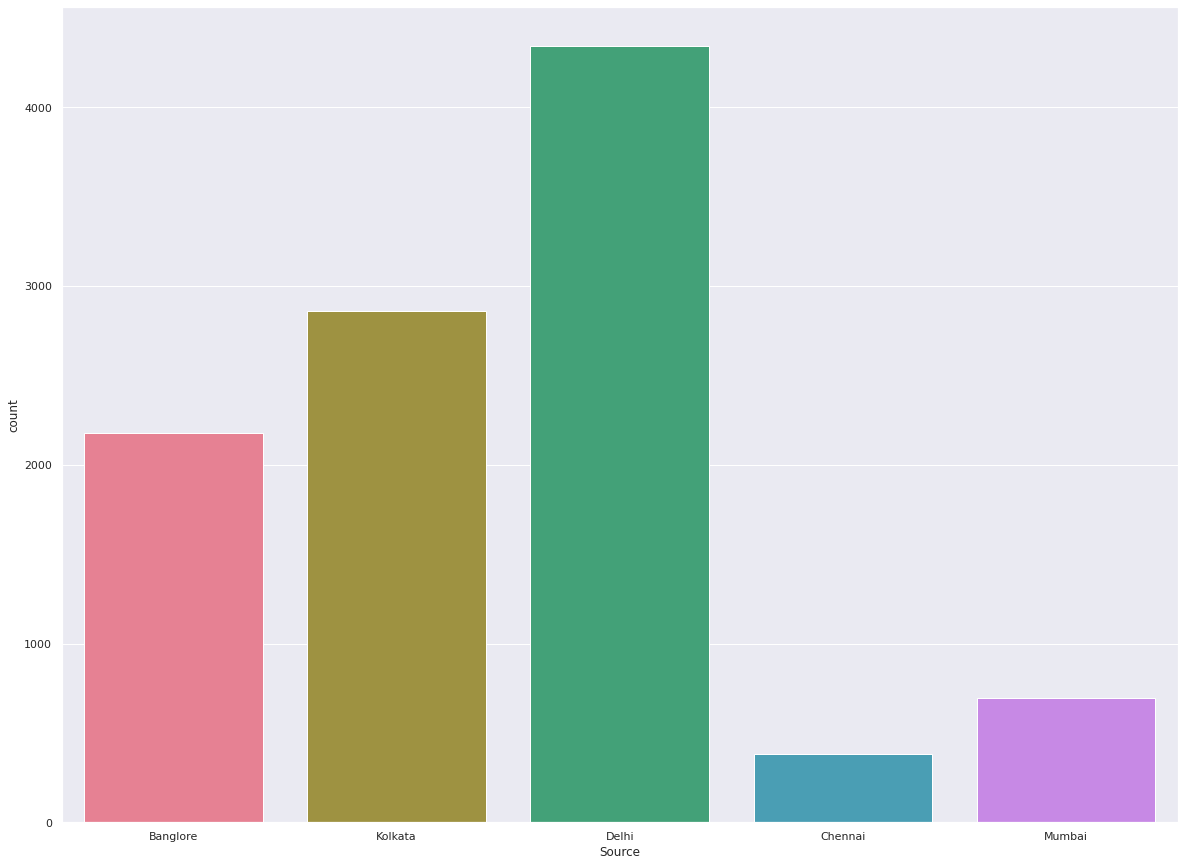

In [20]:
# Visualize the value counts
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.countplot(x='Source', palette='husl', data=fare_train)

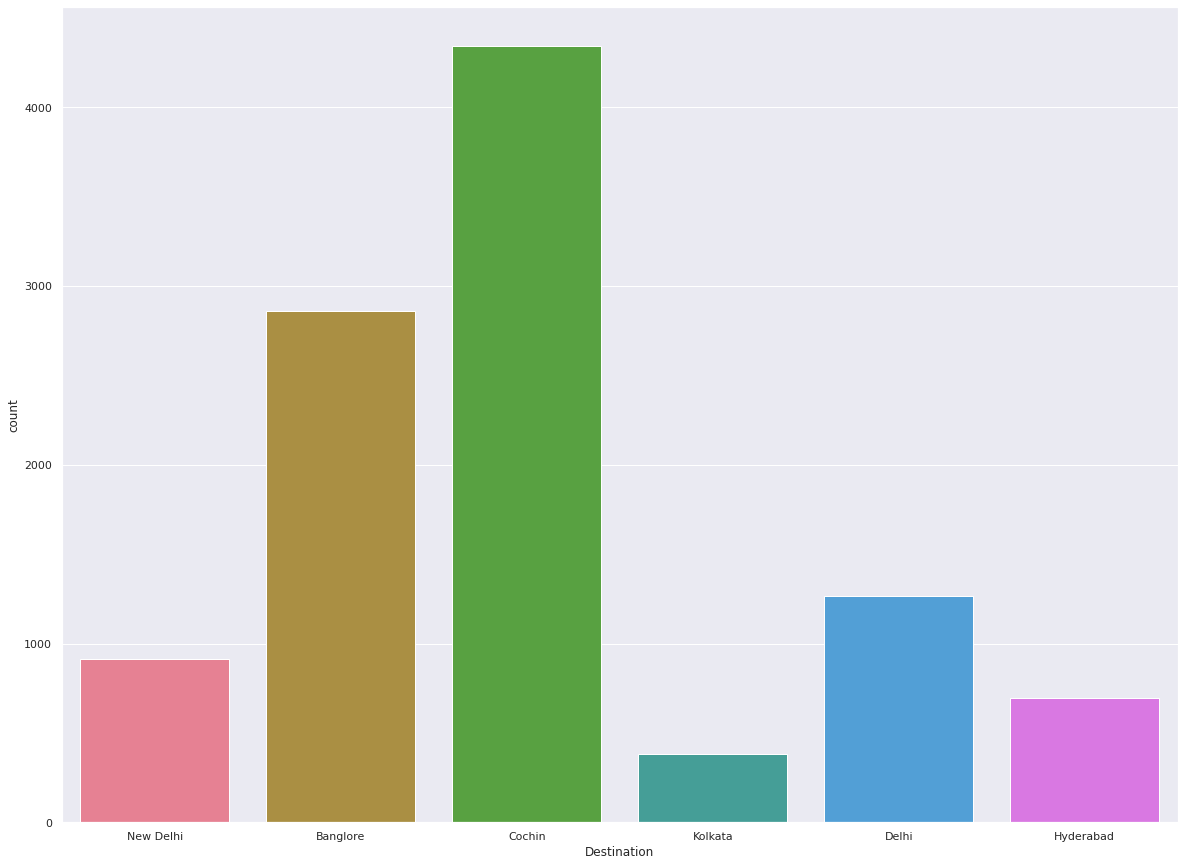

In [21]:
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.countplot(x='Destination', palette='husl', data=fare_train)

Most flights were from Delhi headed towards Cochin

### Route

What was the most expensive route?

In [22]:
fare_train.groupby(by ='Price').max()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Year
Price,,,,,,,,,,,,,
1759,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,07:05,1h 30m,non-stop,No info,3,27,2019
1840,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,3,27,2019
1965,SpiceJet,9/06/2019,Mumbai,Hyderabad,BOM → HYD,22:45,14:45,1h 30m,non-stop,No check-in baggage included,12,27,2019
2017,SpiceJet,9/05/2019,Mumbai,Hyderabad,BOM → HYD,22:45,14:45,1h 30m,non-stop,No info,12,27,2019
2050,Air India,3/04/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 30m,non-stop,No info,3,27,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52285,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,6,3,2019
54826,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,23:00,6h 5m,1 stop,No info,3,18,2019
57209,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,1,3,2019


The most expensive flights are from Banglore to New Delhi and by Business priority. On the other hand, the cheapest flights were all from Mumbai to Hyderbaad and were non stop.

In [23]:
# Airline
fare_train["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

### Departure Time

In [24]:
def time_extractor(column, data):
  '''
  Creates new hour and minute columns

  args
  column --- The time column
  data --- Data containing the column 

  returns
  hour and minute
  '''
  if column == 'Dep_Time':

    time_list = [value.split(':') for value in data[column].values]
    
    hour = list(map(int,
                    [time_list[index][0] for index in range(len(time_list))]))
    minute = list(map(int, 
                      [time_list[index][1] for index in range(len(time_list))]))
    
    return hour, minute
  
  elif column == 'Arrival_Time':
    list_one = [value.split() for value in data[column].values]
    lists = [list_one[index][0]  for index in range(len(list_one))]
    time_list = [value.split(':') for value in lists]
    
    hour = list(map(int,
                    [time_list[index][0] for index in range(len(time_list))]))
    minute = list(map(int, 
                      [time_list[index][1] for index in range(len(time_list))]))
   
    return hour, minute



In [25]:
# Create hour and minute column from departure column
fare_train['Dep_hour'], fare_train['Dep_minute'] = time_extractor('Dep_Time', 
                                                                  fare_train)

In [26]:
# Create hour and minute column from arrival column
fare_train['Arr_hour'], fare_train['Arr_minute'] = time_extractor('Arrival_Time', 
                                                                  fare_train)

In [27]:
# View
fare_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


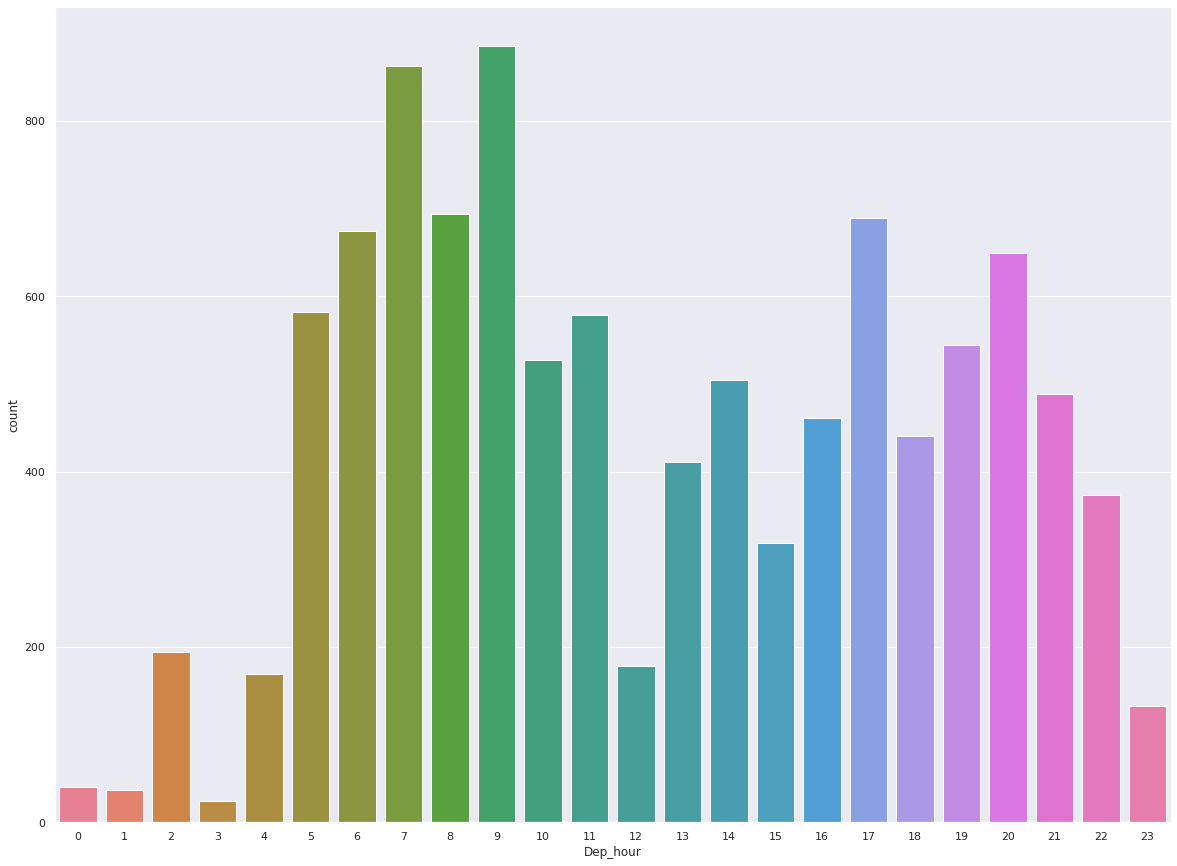

In [28]:
#Visualize departure hour and count
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.countplot(x='Dep_hour', palette='husl', data=fare_train)

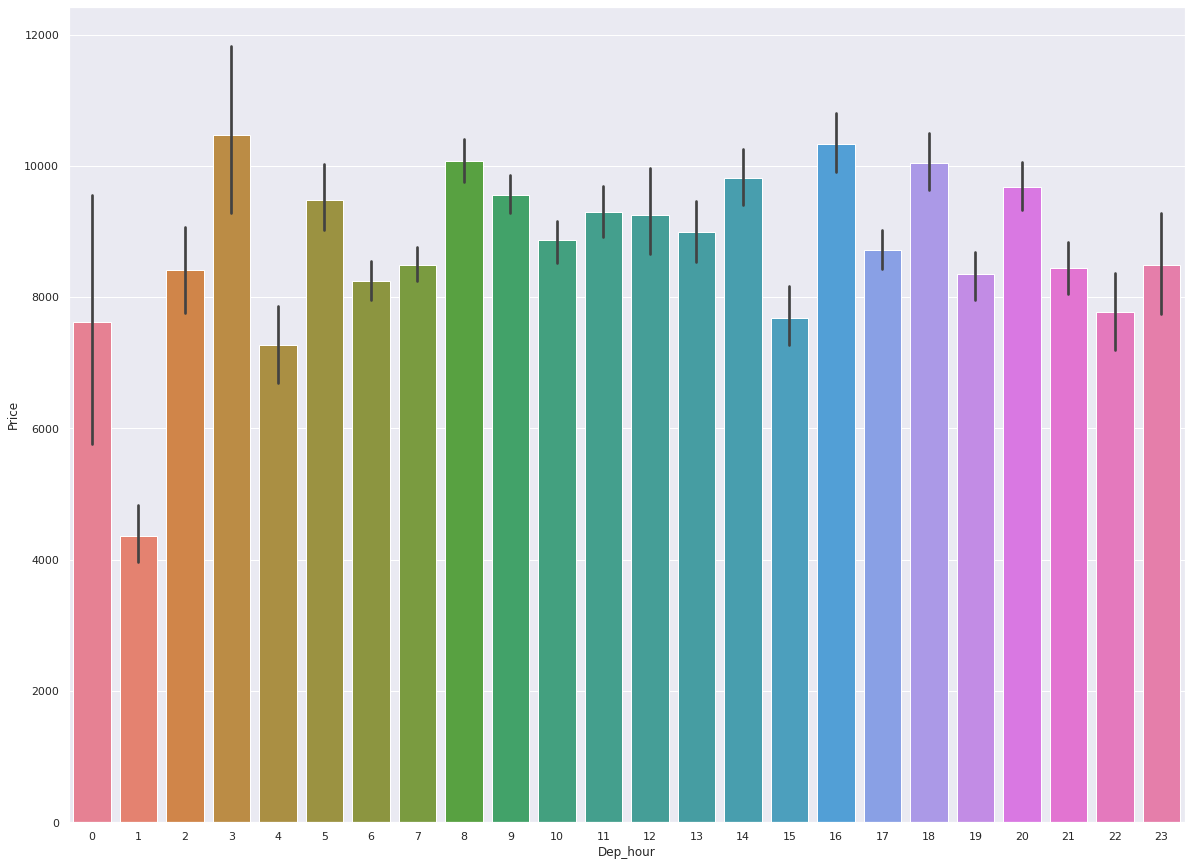

In [29]:
#Visualize departure hour and Price
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.barplot(x='Dep_hour', y='Price', palette='husl', data=fare_train)

Late flights tend to be more expensive compared to day flights.

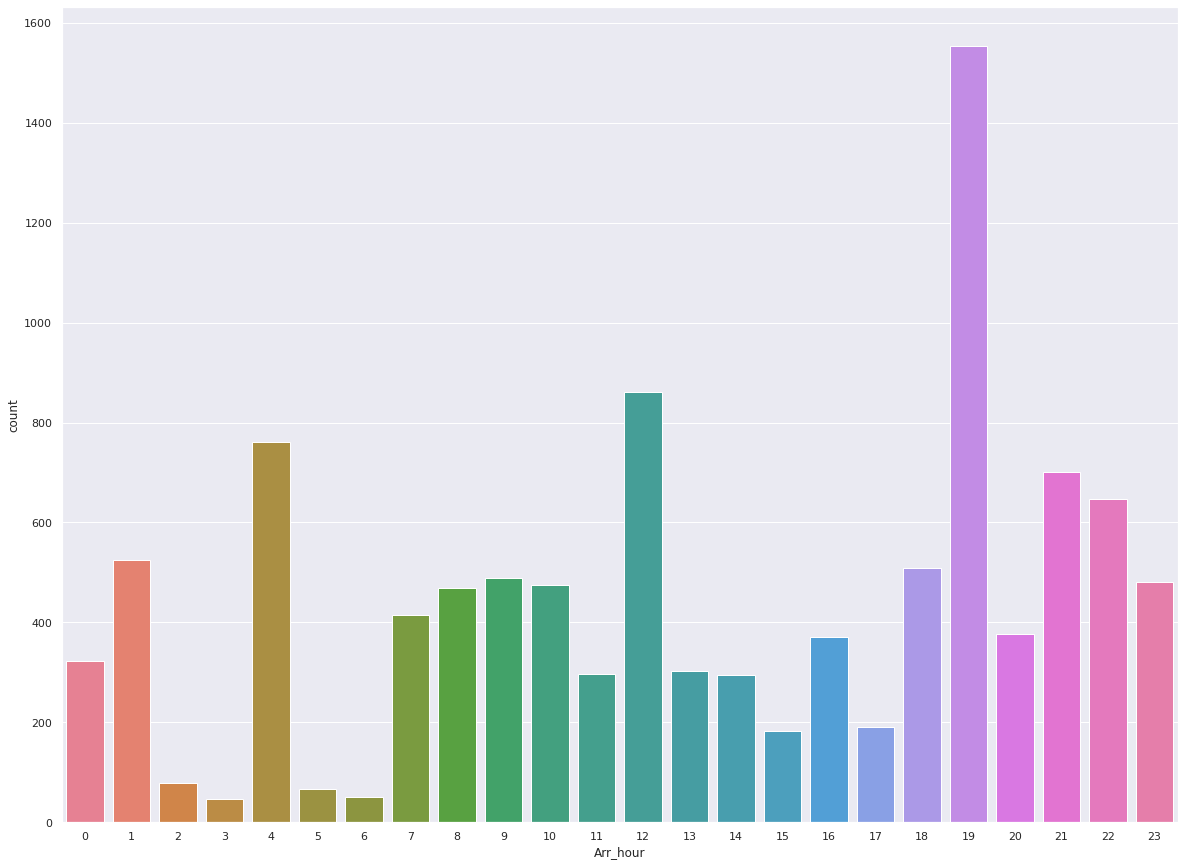

In [30]:
#Visualize Arrival hour and count
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.countplot(x='Arr_hour', palette='husl', data=fare_train)

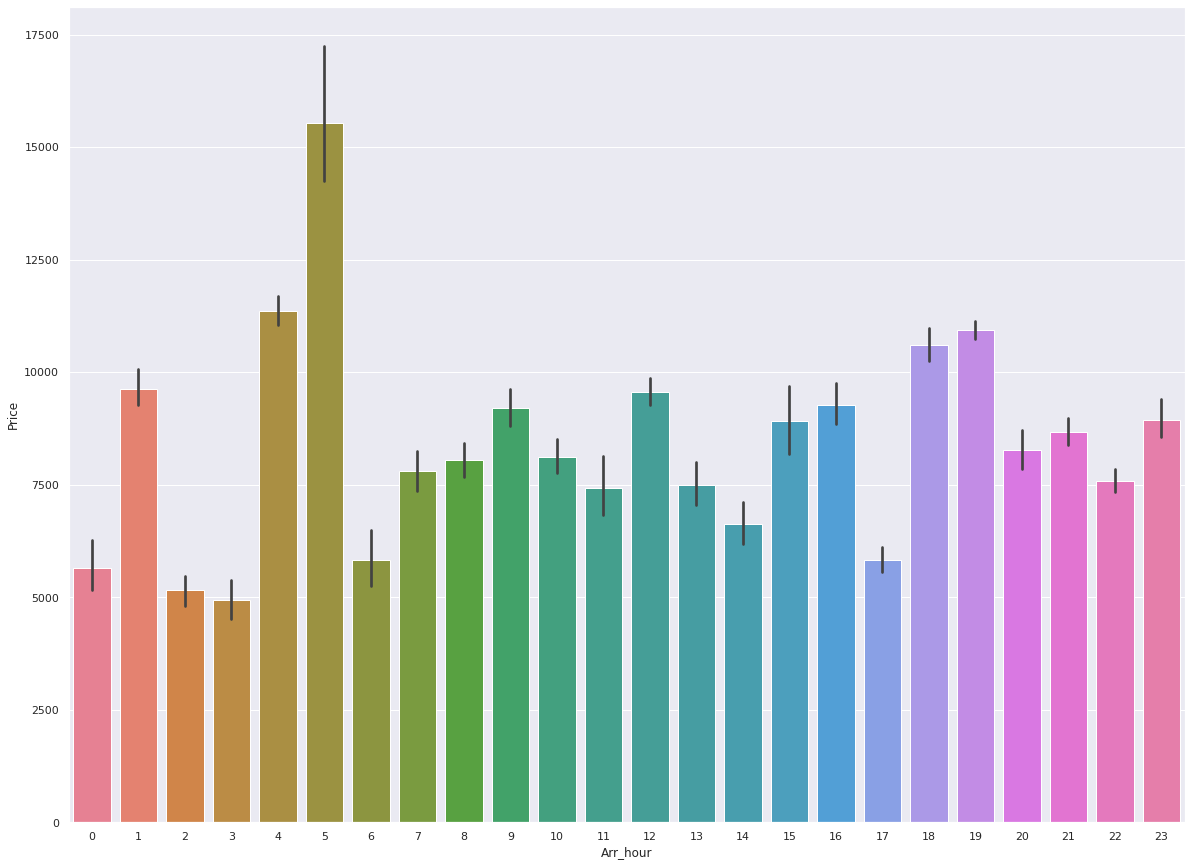

In [31]:
#Visualize Arrival hour and Price
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.barplot(x='Arr_hour', y='Price', palette='husl', data=fare_train)

Confirm that early morning flights are more expensive.

In [32]:
# Bin Arrival Time and Dep Time

# Dep Time
fare_train.loc[fare_train.Dep_hour <= 5 , 'Dep_Bin'] = 'em'
fare_train.loc[(fare_train.Dep_hour > 5) & (fare_train.Dep_hour <= 12), 'Dep_Bin'] = 'm'
fare_train.loc[(fare_train.Dep_hour > 12) & (fare_train.Dep_hour <= 18), 'Dep_Bin'] = 'af'
fare_train.loc[(fare_train.Dep_hour > 18) & (fare_train.Dep_hour <= 23), 'Dep_Bin'] = 'n'

# Arrival Time
fare_train.loc[fare_train.Arr_hour <= 5 , 'Arr_Bin'] = 'em'
fare_train.loc[(fare_train.Arr_hour > 5) & (fare_train.Arr_hour <= 12), 'Arr_Bin'] = 'm'
fare_train.loc[(fare_train.Arr_hour > 12) & (fare_train.Arr_hour <= 18), 'Arr_Bin'] = 'af'
fare_train.loc[(fare_train.Arr_hour > 18) & (fare_train.Arr_hour <= 23), 'Arr_Bin'] = 'n'

### Duration

In [33]:
# Get the index of the outlier
i = fare_train[fare_train['Duration'] == '5m'].index


In [34]:
# Drop the outlier
fare_train = fare_train.drop(i).reset_index(drop=True)

In [35]:
def duration_cleaner(column, data):
  values = data[column].values

  split = [value.split('h') for value in values]
  
  hour = list(map(int, [split[index][0] for index in range(len(values))]))
  pre_minute = [split[index][1] for index in range(len(values))]
  
  xe = []
  for index, minute in enumerate(pre_minute):
    v =  [letter for letter in minute]
    xe.append(v)
  
  for value in xe:
    if 'm' in value:
      value.remove('m')

  for index, val in enumerate(xe):
    xe[index] = ''.join(xe[index])
  
  for index, val in enumerate(xe):
    if val == '':
      xe[index] = '0'
  
  minutes = list(map(int, xe))

  hour_to_minutes = list(map(lambda x:x*60, hour))
  total_duration = [a+b for a,b in zip(hour_to_minutes, minutes)]

  

  return total_duration



In [36]:
# Create column known as total duration
fare_train['Total_Duration'] = duration_cleaner('Duration', fare_train)

In [37]:
# Confirm outlook
fare_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Dep_Bin,Arr_Bin,Total_Duration
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,n,em,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,em,af,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,m,em,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,af,n,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,af,n,285


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


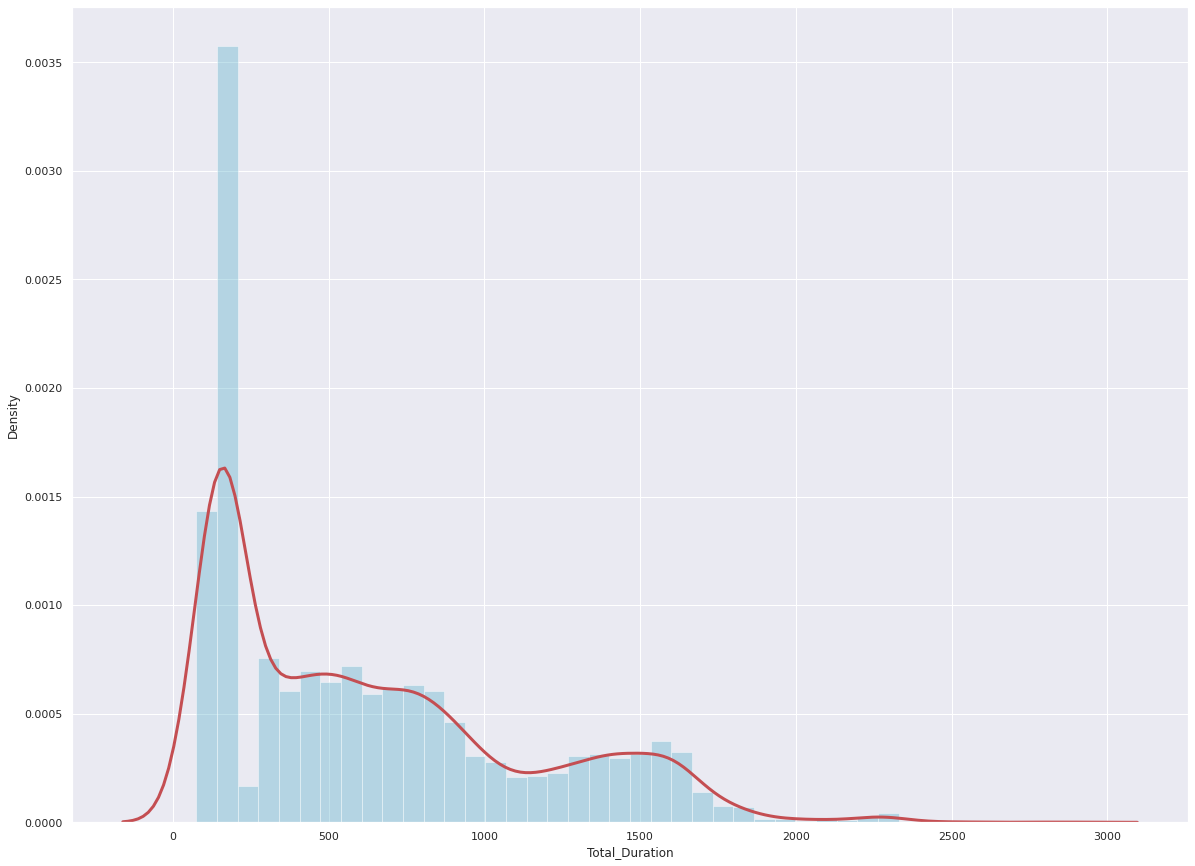

In [38]:
# Histogtam of Duration
sns.distplot(fare_train['Total_Duration'], 
             kde_kws={"color": "r", "lw": 3, "label": "KDE"},
             hist_kws={"color": "c"})

In [39]:
# Bin Duration
fare_train.loc[fare_train.Total_Duration <= 180 , 'Duration_Bin'] = 'short'
fare_train.loc[(fare_train.Total_Duration > 180) & (fare_train.Total_Duration <= 360), 'Duration_Bin'] = 'medium'
fare_train.loc[fare_train.Total_Duration > 360, 'Duration_Bin'] = 'long'

### Total Stops

In [40]:
# Check unique values
fare_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [41]:
# Encode total stops
mapping = {
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
}

fare_train['Total_Stops'] = fare_train['Total_Stops'].map(mapping)

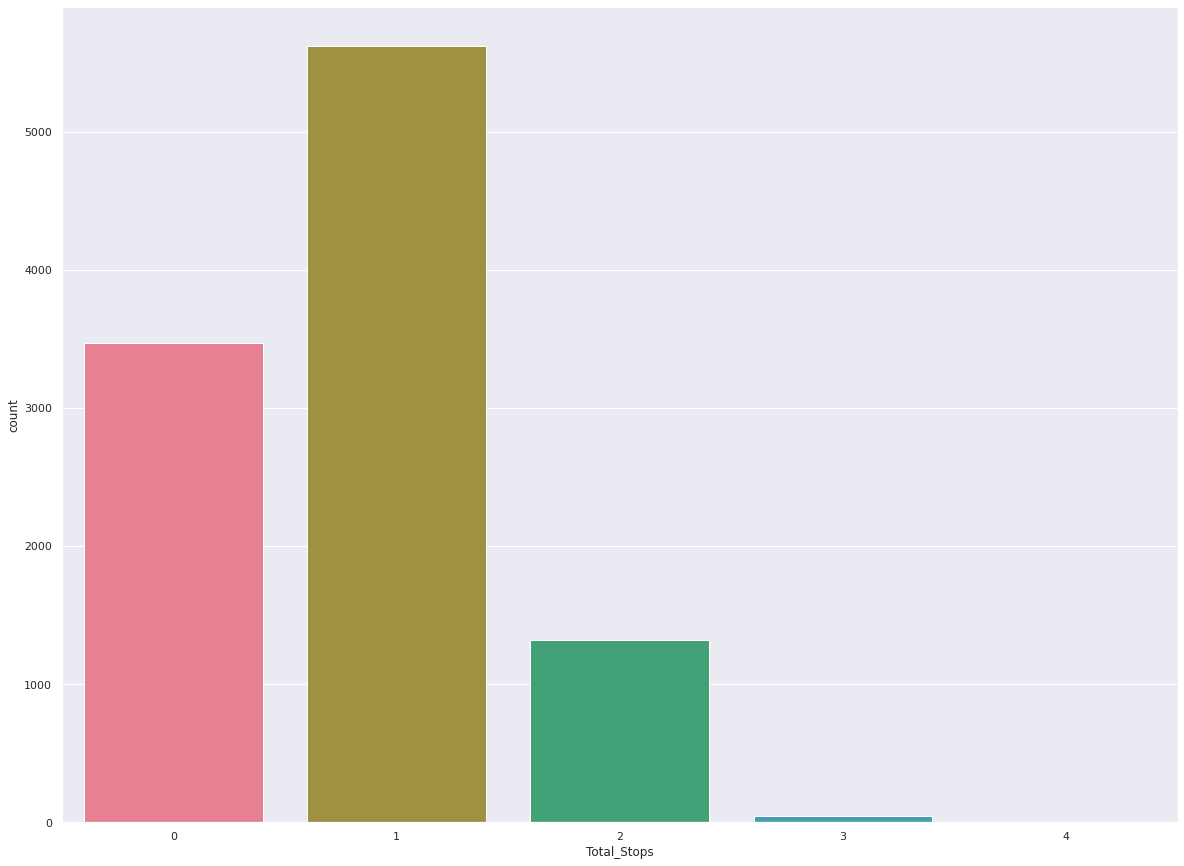

In [42]:
# View total stops counts
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.countplot(x='Total_Stops', palette='husl', data=fare_train)

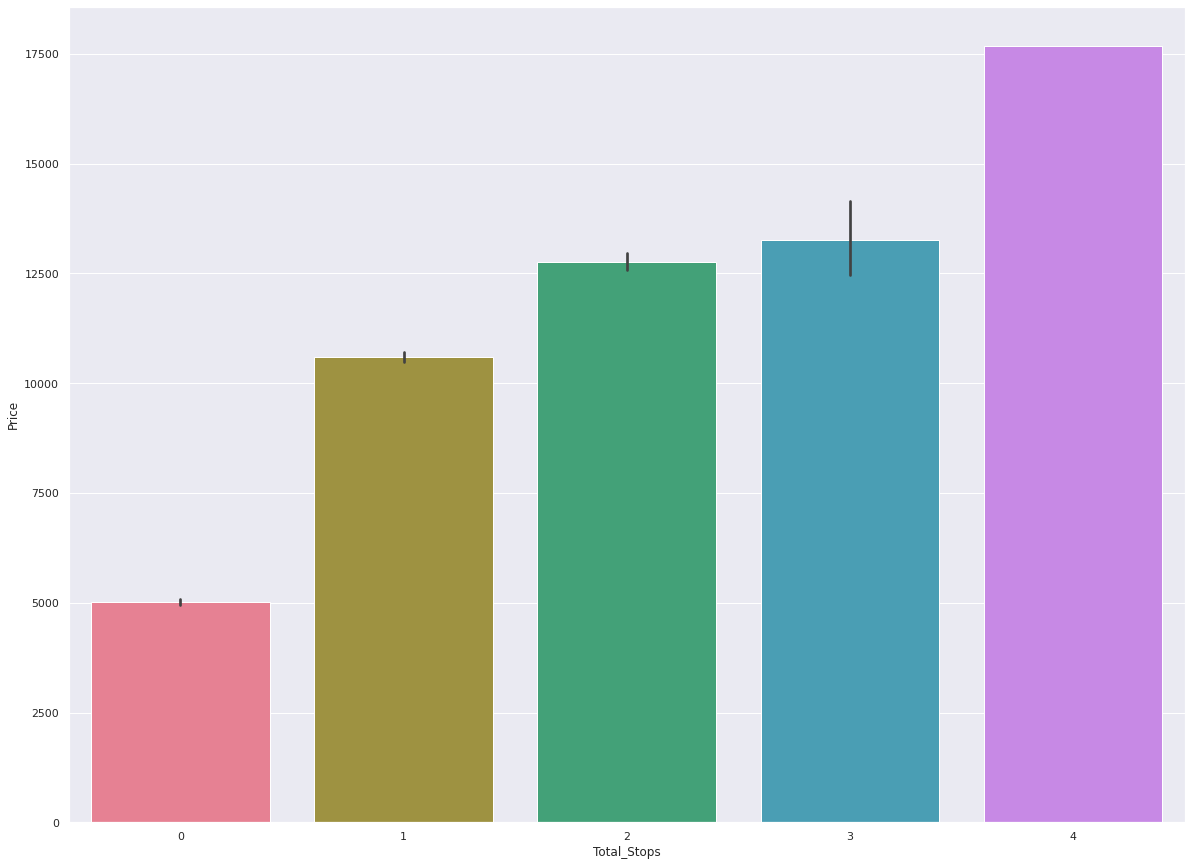

In [43]:
# View total stops counts
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.barplot(x='Total_Stops', y='Price', palette='husl', data=fare_train)

The more the stops, the more expensive the trip.

### Additional Info

In [44]:
# Check unique values
fare_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [45]:
for index, value in enumerate(fare_train['Additional_Info'].values):
  if value == 'No Info':
    fare_train['Additional_Info'].values[index] = 'No info'


[Text(0, 0, 'No info'),
 Text(0, 0, 'In-flight meal not included'),
 Text(0, 0, 'No check-in baggage included'),
 Text(0, 0, '1 Short layover'),
 Text(0, 0, '1 Long layover'),
 Text(0, 0, 'Change airports'),
 Text(0, 0, 'Business class'),
 Text(0, 0, 'Red-eye flight'),
 Text(0, 0, '2 Long layover')]

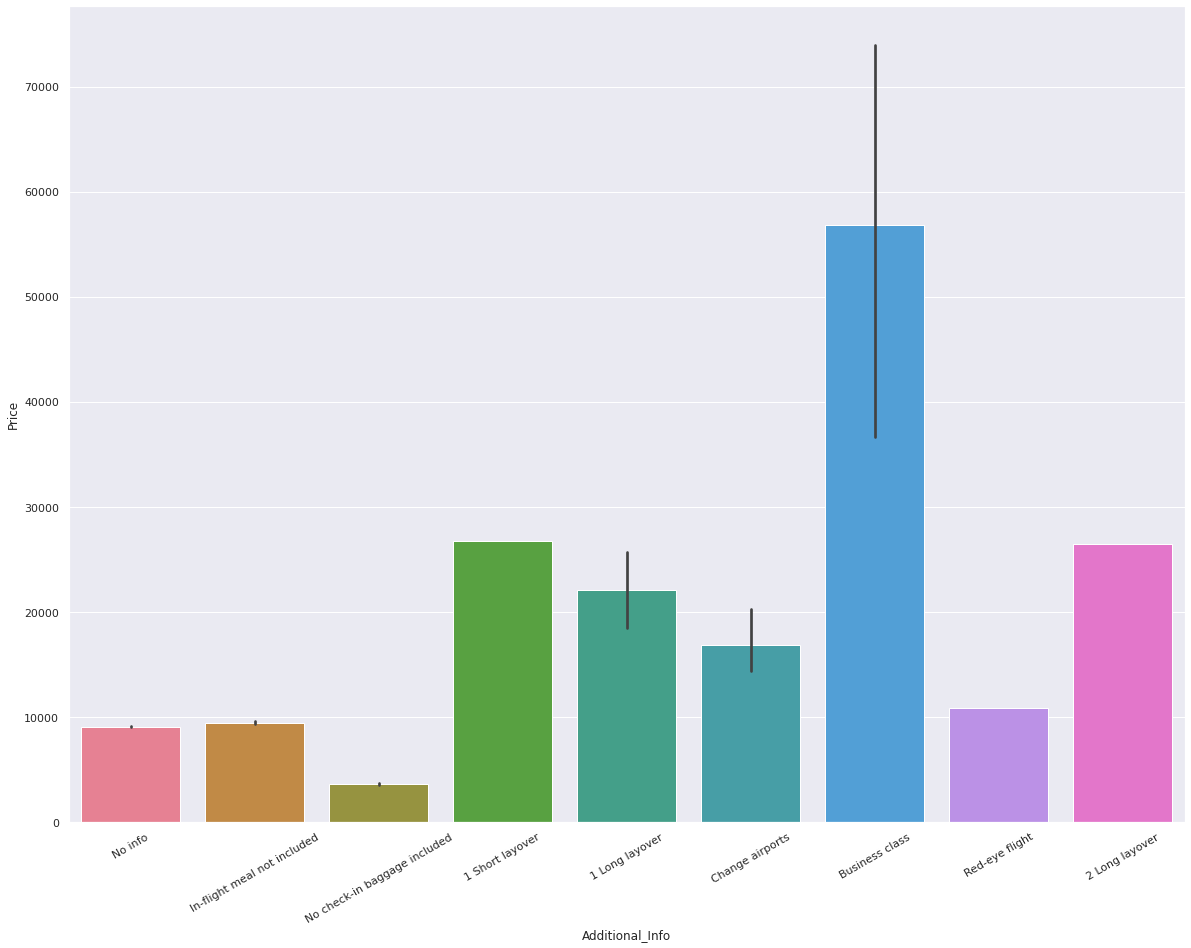

In [46]:
# View total stops counts
sns.set(rc={'figure.figsize': (20, 15)})
ag = sns.barplot(x='Additional_Info', y='Price', palette='husl', data=fare_train)
ag.set_xticklabels(labels=fare_train['Additional_Info'].unique(),
                   rotation=30)

Business class for sure is the most expensive.

In [47]:
# Additional_Info
fare_train["Additional_Info"].replace({ 
                                       'In-flight meal not included':'other',
                                        '1 Long layover':'layover',
                                        '1 Short layover':'layover',
                                        'Red-eye flight':'Other',
                                        '2 Long layover':'layover',   
                                                   },    
                                        inplace=True)

## Create new features

In [48]:
# Duration + airline
fare_train['Duration_Airline'] = fare_train['Total_Duration'].astype('str') + '_' + fare_train['Airline']

# Stops + airline
fare_train['Stops_Airline'] = fare_train['Total_Stops'].astype('str') + '_' + fare_train['Airline']


# Source + Destination
fare_train['Source_Destination'] = fare_train['Source'] + '_' + fare_train['Destination']

# Total Stops + Duration
fare_train['Stops_Duration'] = fare_train['Total_Stops'].astype('str')  + '_' + fare_train['Total_Duration'].astype('str')

# Total stops + Route
fare_train['Stops_Route'] = fare_train['Total_Stops'].astype('str') + '_' + fare_train['Source_Destination']

# Time bin
fare_train['Time_Bin'] = fare_train['Dep_Bin'] + '_' + fare_train['Arr_Bin']

# Time bin + route
fare_train['Time_Route'] = fare_train['Time_Bin'] + '_' + fare_train['Source_Destination']

### Encoding data*

Encode categorical data

In [50]:
# Drop unnecessary features


TO_USE = ['Stops_Airline', 'Day', 'Total_Duration', 'Month', 'Airline',
         'Additional_Info', 'Route', 'Dep_hour', 'Arr_hour','Source',
          'Destination', 'Dep_minute', 'Arr_minute', 'Total_Stops', 'Price']


to_train = fare_train[TO_USE]



In [51]:
#  Start with label encode

cat_columns = [x for x in to_train.columns if to_train[x].dtype == 'O']

# Encode
encoder = LabelEncoder()

for column in cat_columns:
  to_train[column] = encoder.fit_transform(to_train[column].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Removing Outliers

In [52]:
# Percentile range
upper, lower = np.percentile(to_train, [1,99])

In [53]:
# Remove outliers
x = to_train.copy()

to_train = np.clip(to_train, upper, lower)

In [54]:
# Make copy for catboost algo
cat_boost_copy = to_train.copy()

Won't scale the data since we will be using tree based models.

### Further exploration

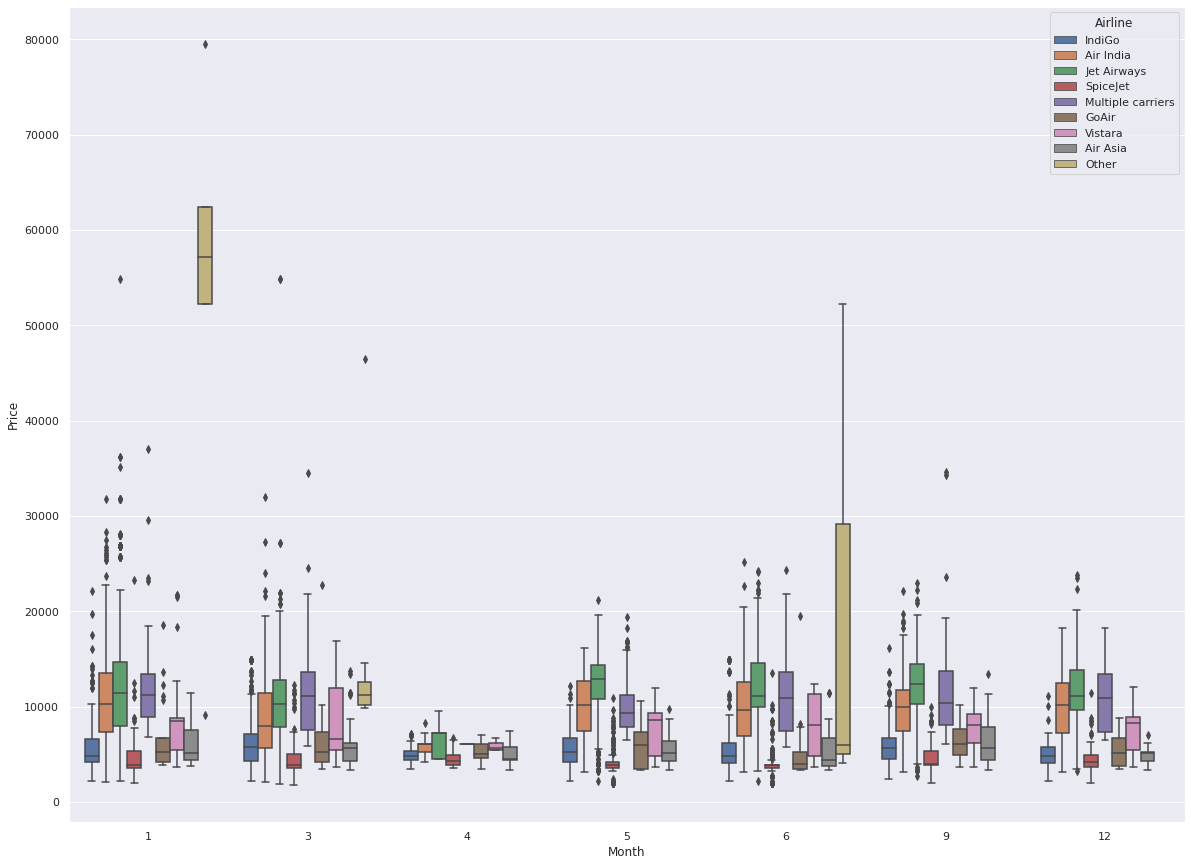

In [56]:
# The usage of airlines in the monthsd

sns.boxplot(x='Month', y='Price', hue='Airline', palette='deep',
                data=fare_train)

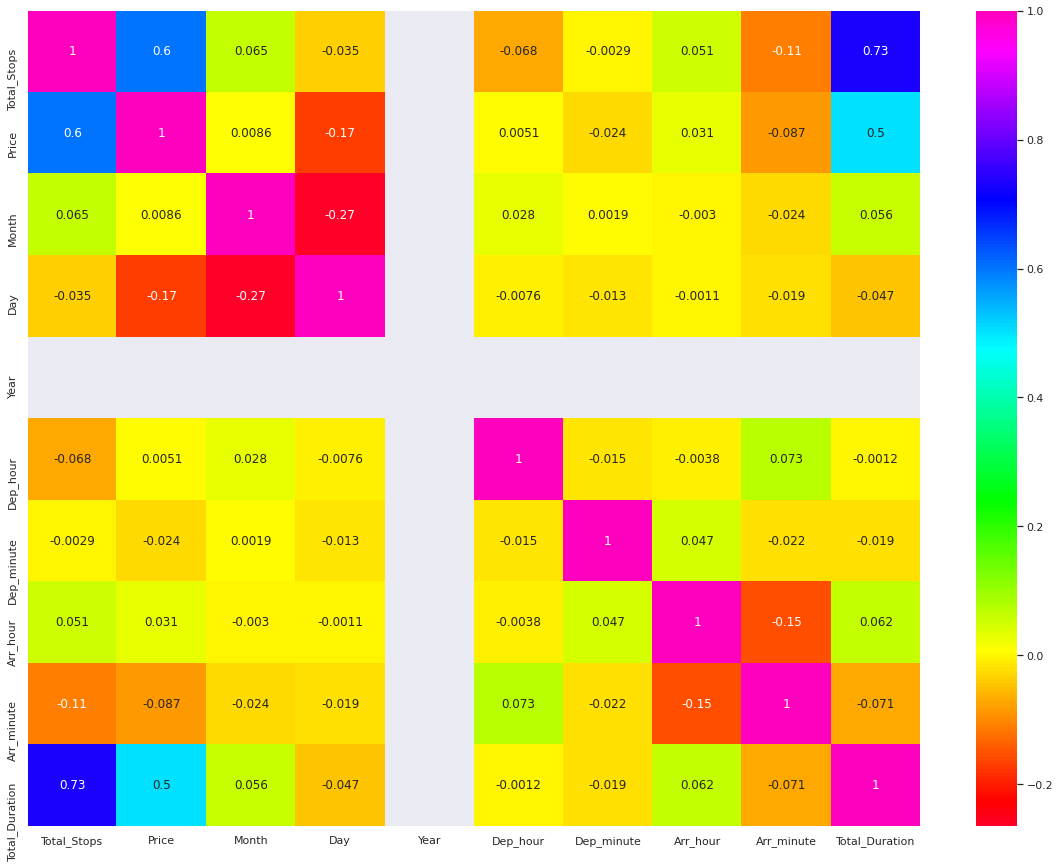

In [57]:
# Heat map
corr_matrix = fare_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='gist_rainbow')

## Preparation for modelling


In [58]:
# separate into features and target

x = to_train.drop('Price', axis=1)
y = to_train['Price']

cat_x = cat_boost_copy.drop('Price', axis=1)
cat_y = cat_boost_copy['Price']

In [60]:
# split into train and test
RANDOM_STATE = 7
x_train, x_pre, y_train, y_pre = train_test_split(x, y, test_size=0.3,
                                                    random_state=RANDOM_STATE)

x_val, x_test, y_val, y_test = train_test_split(x_pre, y_pre, test_size=0.5,
                                                    random_state=RANDOM_STATE)

cat_x_train, cat_x_pre, cat_y_train, cat_y_pre = train_test_split(cat_x,
                                                    cat_y,
                                                    test_size=0.3,
                                                    random_state=RANDOM_STATE)

cat_x_val, cat_x_test, cat_y_val, cat_y_test = train_test_split(cat_x_pre,
                                                    cat_y_pre,
                                                    test_size=0.5,
                                                    random_state=RANDOM_STATE)

# Modelling

Creation of several models to train 

In [61]:
# Instantiate the models
tree = DecisionTreeRegressor()
forest = RandomForestRegressor(random_state=RANDOM_STATE)
adaboost = AdaBoostRegressor()
xgb_reg = xgb.XGBRFRegressor()
cat_reg = catboost.CatBoostRegressor(cat_features=cat_columns, verbose=False, 
                                     random_state=RANDOM_STATE)
voting = VotingRegressor([('forest', forest), ('adaboost', adaboost)])

# save them in a list 

models = [tree, forest, adaboost, xgb_reg, voting]

In [62]:
# define a model Trainer
def model_trainer(models, x_train, y_train, x_val, y_val):
  for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_val)
    rmse = mean_squared_error(y_val, predictions, squared=False)
    r2 = r2_score(y_val, predictions)
    other = np.sqrt(np.square(np.log10(predictions +1) - np.log10(y_val +1)).mean())

    print(f'Model {model} , rmse: {rmse}, r2_score: {r2},\
    other evaluation:{other}')





In [64]:
# Train models
model_trainer(models, x_train, y_train, x_val, y_val)

Model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') , rmse: 1236.4610646434821, r2_score: 0.8838836920156118,    other evaluation:0.06447214764626091
Model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=Fa

In [65]:
model_trainer([cat_reg], cat_x_train, cat_y_train, cat_x_val, cat_y_val)

Model <catboost.core.CatBoostRegressor object at 0x7f8b463abc90> , rmse: 987.4560449240064, r2_score: 0.9259427001225362,    other evaluation:0.05269236160388484


**Random Forest** was the best performer with an rmse of **982** and an r2 score of **0.926**

In [66]:
# View feature importance
def plot_feature_importance(trained_model, features_train):

    #Create arrays from feature importance and feature names
    feature_importance = trained_model.feature_importances_
    feature_names = features_train.columns

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.set_style('whitegrid')
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],
                palette='husl')
    #Add chart labels
    plt.title('FEATURE IMPORTANCES')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

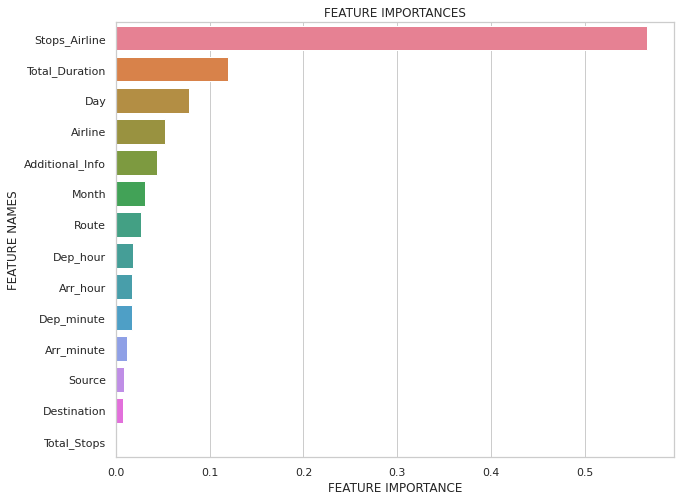

In [67]:
# Plot importance
plot_feature_importance(forest, x_train)

In [68]:
# Retrain Random Forest

forest.fit(x_train, y_train)
predictions = forest.predict(x_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


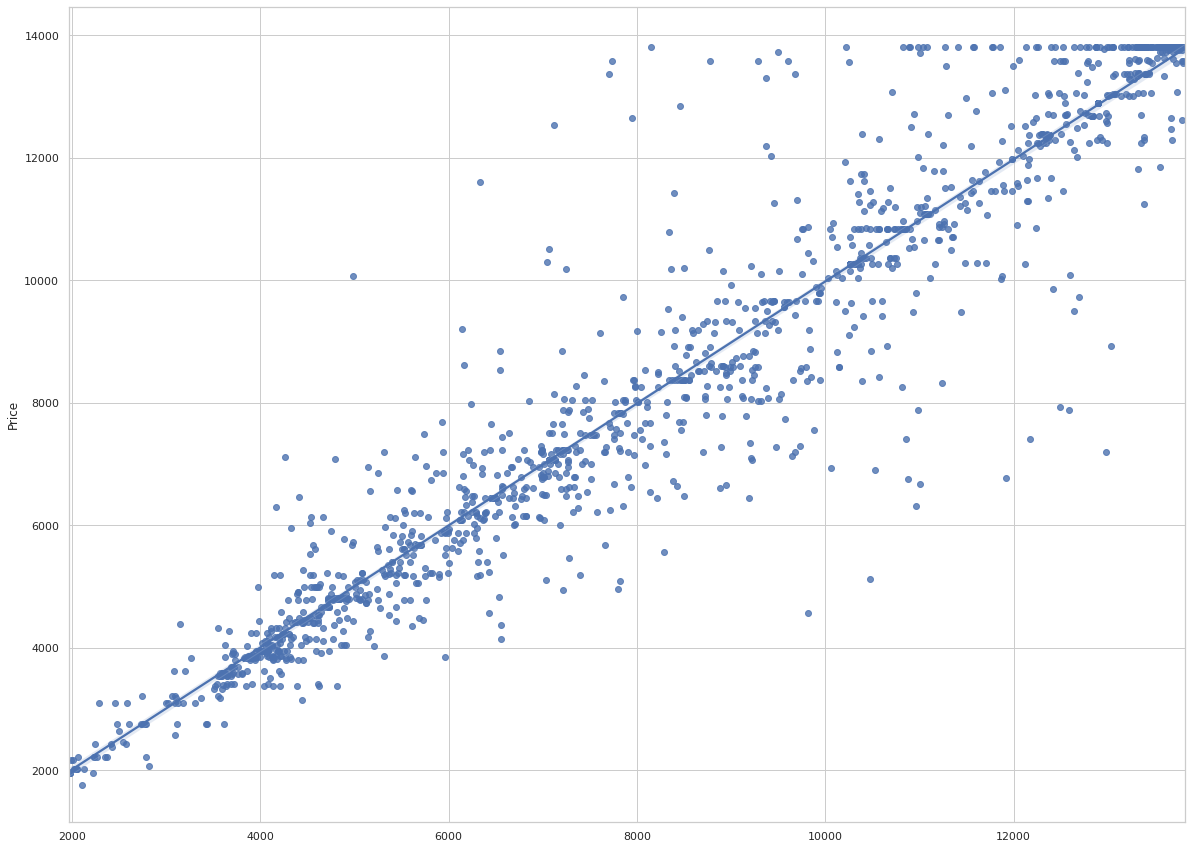

In [69]:
# Plot an regplot

sns.regplot(predictions, y_val)

## Hyperparameter Tuning

Hyperparameter tune Random Forest then retrain it on all the data

In [71]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [72]:
# Instantiate CV 
cv = RandomizedSearchCV(forest, random_grid, 
                        scoring='neg_root_mean_squared_error', cv=5 )

In [73]:
# Fit CV
cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [74]:
# Get the best score
print(cv.best_score_)

# Get the best estimator
best_forest = cv.best_estimator_

# Print the best parameters
print(cv.best_params_)

-970.1966630069222
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


## Retrain model and Evaluate

In [78]:
# Concatenate the train and validation values
X_train = pd.concat([x_train, x_val], axis=0)
Y_train = pd.concat([y_train, y_val], axis=0)

In [80]:
# Retrain model on new data
best_forest.fit(X_train, Y_train)

preds = best_forest.predict(x_test)

rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)
   

print(f'Random Forest , rmse: {rmse}, r2_score: {r2}')

Random Forest , rmse: 897.9394301936318, r2_score: 0.9383110972777291


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


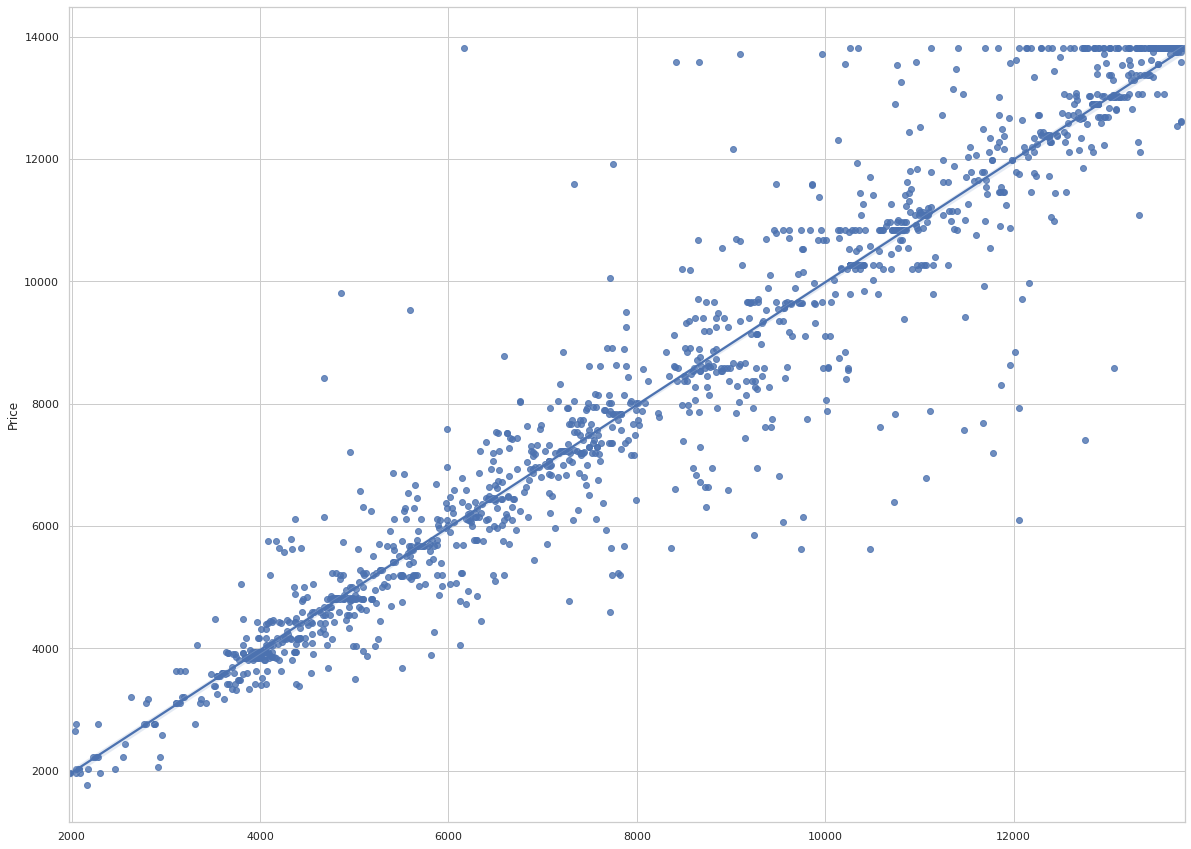

In [81]:
# Plot an regplot

sns.regplot(preds, y_test)

The model performs superbly:
* Validation RMSE : **970**
* Test RMSE: **897**

In [84]:
# Save model
joblib.dump(best_forest, 'forest.pkl')

['forest.pkl']